In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

path = "C:/Users/Admin/Documents/ironhack/streaming_service_recommender/"

## EDA Age Rating

#### Goals

- Get descriptive statistics for age ratings for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Netflix
#### i. Import data

In [2]:
netflix = pd.read_pickle(path + "Data/netflix_final_clean.pkl")

In [3]:
netflix.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Breaking Bad,2008,18.0,9.5,tt0903747,tvSeries,Breaking Bad,Breaking Bad,2008.0,2008.0,49.0,"Crime,Drama,Thriller"
1,Stranger Things,2016,16.0,8.8,tt4574334,tvSeries,Stranger Things,Stranger Things,2016.0,2016.0,51.0,"Drama,Fantasy,Horror"
2,Sherlock,2010,16.0,9.1,tt1475582,tvSeries,Sherlock,Sherlock,2010.0,2010.0,88.0,"Crime,Drama,Mystery"
3,Better Call Saul,2015,18.0,8.7,tt3032476,tvSeries,Better Call Saul,Better Call Saul,2015.0,2015.0,46.0,"Crime,Drama"
4,The Office,2005,16.0,8.9,tt0386676,tvSeries,The Office,The Office,2005.0,2005.0,22.0,Comedy


In [4]:
netflix["age"].isna().sum()

634

In [5]:
1 - (netflix["age"].isna().sum() / len(netflix))

0.6527929901423877

**NOTE : We have 634 null values for the ratings column, meaning that we are using just 65% of the values for this analysis.**

#### ii. Descriptive statistics

In [6]:
netflix["age"].describe()

count    1192.000000
mean       12.201342
std         6.419015
min         0.000000
25%         7.000000
50%        16.000000
75%        18.000000
max        18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by netflix have are in average for 12 years or older.
- One quarter of the tv shows are for 18 years or older.
- One quarter of the tv shows are for 7 years or older.

#### iii. Plotting

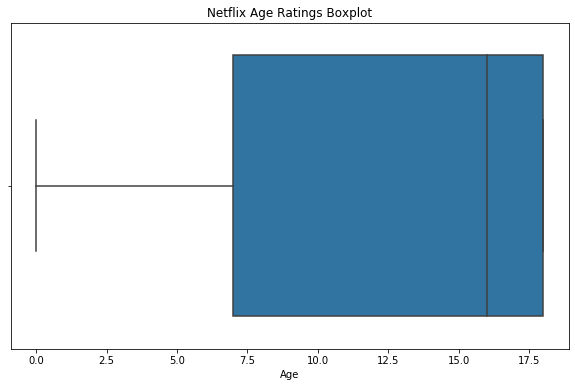

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(netflix["age"])
ax.set_title("Netflix Age Ratings Boxplot")
ax.set_xlabel("Age");

From the box plot we can clearly see how most of the tv shows are distributed from 7 years or older to 16 years or older. Just 25% of the tv shows are for 18 or older.

We will create a new column specifying the audience:

- 0-7 years: Children
- 7-16 years: Teen
- 18 years: Adult

In [8]:
netflix["audience"] = np.where(netflix["age"] <= 7, "Children", np.where(netflix["age"] < 18, "Teen", "Adult"))

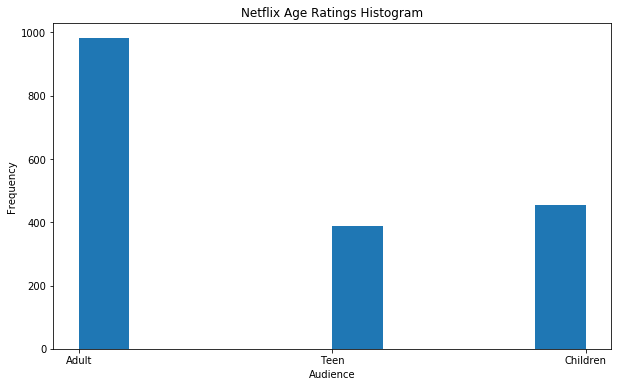

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(netflix["audience"])
ax.set_title("Netflix Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

From the histogram above, we can see, as stated before, that most of the tv shows are for 18 years or older. Children and Teen tv shows have around the same values (~450 - 500).

-----

### 2. Amazon
#### i. Import data

In [10]:
amazon = pd.read_pickle(path + "Data/amazon_final_clean.pkl")

In [11]:
amazon.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Wire,2002,18.0,9.3,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
1,The Sopranos,1999,18.0,9.2,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
2,Band of Brothers,2001,18.0,9.4,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"
3,Vikings,2013,18.0,8.6,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
4,Mr. Robot,2015,18.0,8.5,tt4158110,tvSeries,Mr. Robot,Mr. Robot,2015.0,2015.0,49.0,"Crime,Drama,Thriller"


In [12]:
amazon["age"].isna().sum()

846

In [13]:
1 - (amazon["age"].isna().sum() / len(amazon))

0.4735532047293093

**NOTE : We have 846 null values for the ratings column, meaning that we are using just 47% of the values for this analysis.**

#### ii. Descriptive statistics

In [14]:
amazon["age"].describe()

count    761.000000
mean      10.187911
std        7.079634
min        0.000000
25%        7.000000
50%        7.000000
75%       16.000000
max       18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by amazon have are in average for 10 years or older.
- The median is of 7 years or older, meaning that at least 50% of the tv shows are for 7 years or older.
- One quarter of the tv shows are for 16 years or older.

#### iii. Plotting

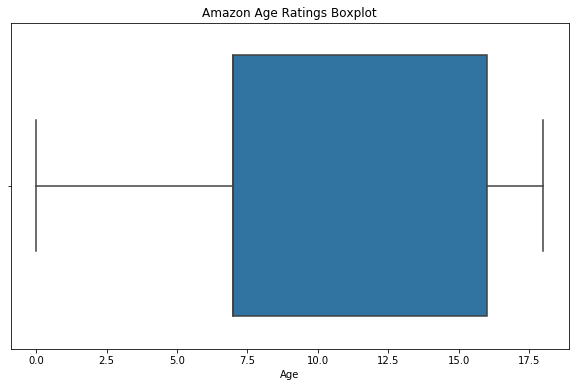

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["age"])
ax.set_title("Amazon Age Ratings Boxplot")
ax.set_xlabel("Age");

From the box plot we can clearly see how most of the tv shows are distributed from 7 years or older to 16 years or older. Less than 25% of the tv shows are for 18 or older.

We will create an audience column, as explained on Netflix.

In [16]:
amazon["audience"] = np.where(amazon["age"] <= 7, "Children", np.where(amazon["age"] < 18, "Teen", "Adult"))

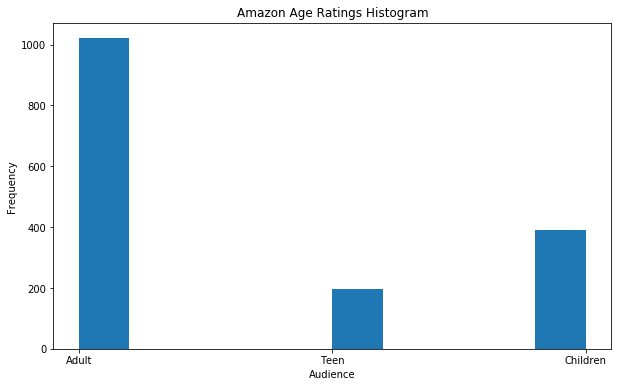

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(amazon["audience"])
ax.set_title("Amazon Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

The histogram above shows amazon seems to have more tv shows for adults than for teen and children. Same as for Netflix

-----

### 3. HBO
#### i. Import data

In [18]:
hbo = pd.read_pickle(path + "Data/hbo_final_clean.pkl")

In [19]:
hbo.head()

,show,year,age,imdb_rating,imdb_id,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Game of Thrones,2011,18.0,9.3,tt0944947,tt0944947,tvSeries,Game of Thrones,Game of Thrones,2011.0,2011.0,57.0,"Action,Adventure,Drama"
1,The Wire,2002,18.0,9.3,tt0306414,tt0306414,tvSeries,The Wire,The Wire,2002.0,2002.0,59.0,"Crime,Drama,Thriller"
2,Chernobyl,2019,18.0,9.4,tt7366338,tt7366338,tvMiniSeries,Chernobyl,Chernobyl,2019.0,2019.0,330.0,"Drama,History,Thriller"
3,The Sopranos,1999,18.0,9.2,tt0141842,tt0141842,tvSeries,The Sopranos,The Sopranos,1999.0,1999.0,55.0,"Crime,Drama"
4,Band of Brothers,2001,18.0,9.4,tt0185906,tt0185906,tvMiniSeries,Band of Brothers,Band of Brothers,2001.0,2001.0,594.0,"Action,Drama,History"


In [20]:
hbo["age"].isna().sum()

33

In [21]:
1 - (hbo["age"].isna().sum() / len(hbo))

0.8225806451612903

**NOTE : We have 33 null values for the ratings column, meaning that we are using just 82% of the values for this analysis.**

#### ii. Descriptive statistics

In [22]:
hbo["age"].describe()

count    153.000000
mean      16.150327
std        4.678860
min        0.000000
25%       18.000000
50%       18.000000
75%       18.000000
max       18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by HBO have are in average for 16 years or older, this can be affected by some outliers, this can be better seen on the boxplot.
- 75% of the tv shows are for 18 years or older.

#### iii. Plotting

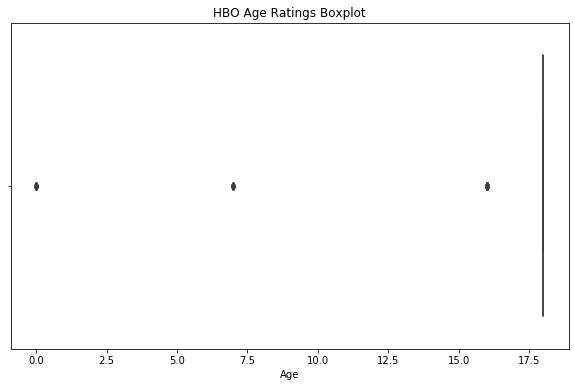

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["age"])
ax.set_title("HBO Age Ratings Boxplot")
ax.set_xlabel("Age");

Since most of the data is for 18 years or older, we will reduce the x axis.

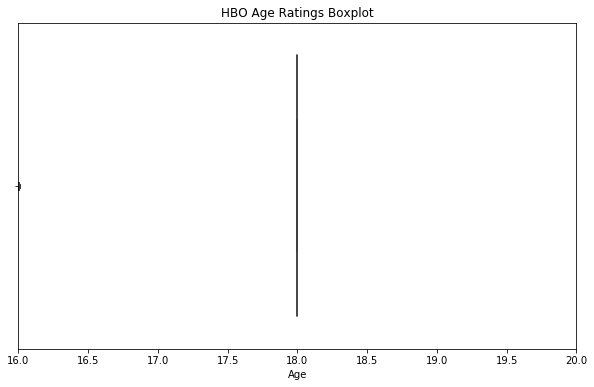

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hbo["age"])
ax.set_title("HBO Age Ratings Boxplot")
ax.set_xlabel("Age")
ax.set_xlim(16,20);

As stated previously, most tv shows remain on 18 years or older.

In [25]:
hbo["audience"] = np.where(hbo["age"] <= 7, "Children", np.where(hbo["age"] < 18, "Teen", "Adult"))

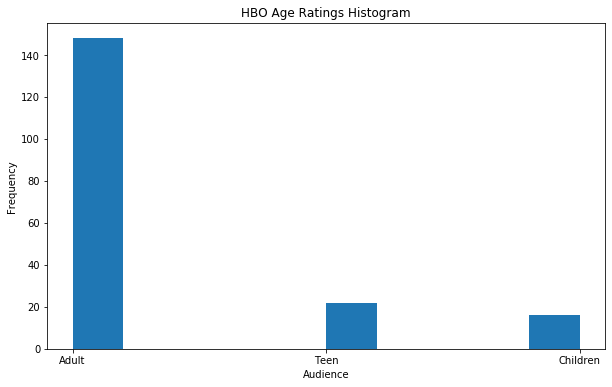

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hbo["audience"])
ax.set_title("HBO Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

In the histogram we can clearly see how the distribution is heavily skewed, having most values for adults and very few for teen and children, children being the lesser one.


### 4. Comparison
#### i. Normalize data

In order to make a comparison, we must normalize the data for each streaming service.

**Netflix**

In [27]:
netflix_age = (netflix.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

In [28]:
netflix_age["frequency"].sum()

1826

In [29]:
netflix_age["normalize"] = round(((netflix_age["frequency"] / netflix_age["frequency"].sum()) * 100), 2)

In [30]:
netflix_age["streaming_service"] = "Netflix"

In [31]:
netflix_age

,audience,frequency,normalize,streaming_service
0,Adult,982,53.78,Netflix
1,Children,455,24.92,Netflix
2,Teen,389,21.30,Netflix


**Amazon**

In [32]:
amazon_age = (amazon.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

amazon_age["normalize"] = round(((amazon_age["frequency"] / amazon_age["frequency"].sum()) * 100), 2)

amazon_age["streaming_service"] = "Amazon"

In [33]:
amazon_age

,audience,frequency,normalize,streaming_service
0,Adult,1021,63.53,Amazon
1,Children,390,24.27,Amazon
2,Teen,196,12.20,Amazon


**HBO**

In [34]:
hbo_age = (hbo.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

hbo_age["normalize"] = round(((hbo_age["frequency"] / hbo_age["frequency"].sum()) * 100), 2)

hbo_age["streaming_service"] = "HBO"

In [35]:
hbo_age

,audience,frequency,normalize,streaming_service
0,Adult,148,79.57,HBO
1,Children,16,8.60,HBO
2,Teen,22,11.83,HBO


#### ii. Combine data frames

In [36]:
age_ratings = netflix_age.append(amazon_age).append(hbo_age).reset_index(drop=True)

In [37]:
age_ratings

,audience,frequency,normalize,streaming_service
0,Adult,982,53.78,Netflix
1,Children,455,24.92,Netflix
2,Teen,389,21.30,Netflix
3,Adult,1021,63.53,Amazon
4,Children,390,24.27,Amazon
5,Teen,196,12.20,Amazon
6,Adult,148,79.57,HBO
7,Children,16,8.60,HBO
8,Teen,22,11.83,HBO


#### ii. Plotting

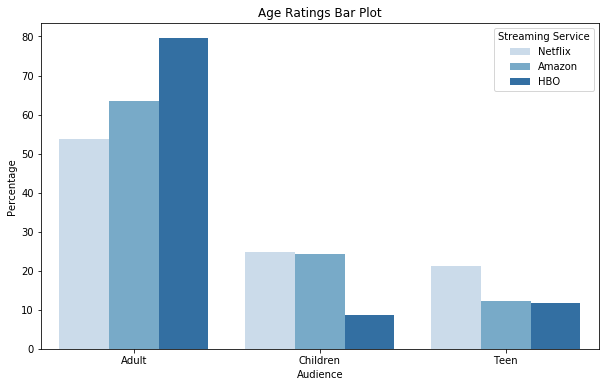

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=age_ratings["audience"]
            , y=age_ratings["normalize"]
            , hue=age_ratings["streaming_service"]
            , palette="Blues"
           , ci=None)

ax.set_xlabel("Audience")
ax.set_ylabel("Percentage")
ax.set_title("Age Ratings Bar Plot")

plt.legend(title="Streaming Service");

From the bar plot above, we can see that HBO has most tv shows for 18 years or older. Amazon and Netflix seem to have similar distributions, netflix having more tv shows for 16 years or older and amazon more tv shows for children.